<a href="https://colab.research.google.com/github/nishantkapps/aiml-projects/blob/main/Project_LendingClubLoanDefault.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import os
from keras import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
%matplotlib inline

In [ ]:
tf.random.set_seed(5)
df = pd.read_csv('/content/drive/MyDrive/datasets/loan_data.csv')

In [ ]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
df['credit.policy'].value_counts()

1    7710
0    1868
Name: credit.policy, dtype: int64

In [ ]:
class_weights = { 1:2, 0:8 }

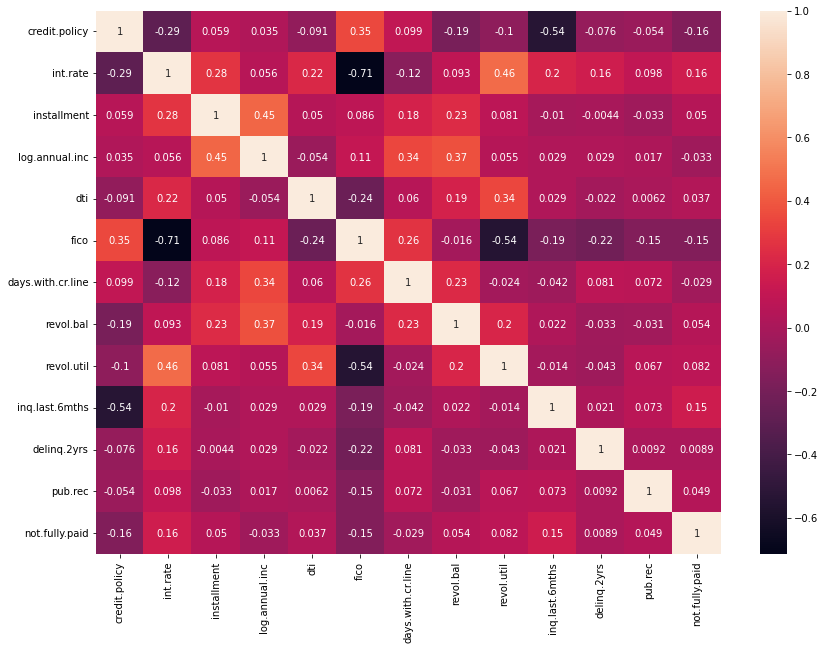

In [ ]:
# Scaling & feature engineering
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True)

From the heatmap, the following can be deciphered


1.   Interest rate and fico are highly correlated
2.   fico and revol.util are highly correlated
3.   credit.policy is highly correlated to inq.last.6months ( so, this will be the principal component

For now, we will retain all the columns and proceed with scaling and building the model. We can remove fico as it is correlated with 2 of the columns as a second / improvement step





### **Section 1 : Run the model without removing any columns**

In [ ]:
# Feature Transformation
x = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [ ]:
# Label Encoding for "purpose" feature in dataset
le = LabelEncoder()
x[:,0]=le.fit_transform(x[:,0])

In [ ]:
# Scaling the dataset
# As this is a binary classification problem, we will use StandardScaler for X variables
ss = StandardScaler()
xscl = ss.fit_transform(x)

In [ ]:
# Train test split
x_train, x_test, y_train, y_test = train_test_split(xscl, y, random_state=23, train_size=0.8)

In [ ]:
x_train.shape

(7662, 13)

In [ ]:
# Model Architecture for a deep learning ( ANN model )
mdl = tf.keras.models.Sequential()
mdl.add(tf.keras.layers.Dense(units=7,activation="relu",input_shape=(13,)))
mdl.add(tf.keras.layers.Dense(units=7,activation="relu"))
mdl.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [ ]:
# Compile ANN model
mdl.compile(optimizer="rmsprop",loss="binary_crossentropy", metrics=['accuracy'])

In [ ]:
es = tf.keras.callbacks.EarlyStopping(patience=30,)

In [ ]:
# Fit the model
mdl_history = mdl.fit(x_train, y_train, epochs=1000, callbacks=[es], class_weight=class_weights, validation_data=(x_test,y_test))

Epoch 1/1000
240/240 [==============================] - 2s 6ms/step - loss: 1.9393 - accuracy: 0.7137 - val_loss: 0.4662 - val_accuracy: 0.8142
Epoch 2/1000
240/240 [==============================] - 1s 4ms/step - loss: 1.4193 - accuracy: 0.7993 - val_loss: 0.3771 - val_accuracy: 0.8340
Epoch 3/1000
240/240 [==============================] - 1s 4ms/step - loss: 1.2336 - accuracy: 0.8188 - val_loss: 0.3393 - val_accuracy: 0.8523
Epoch 4/1000
240/240 [==============================] - 1s 4ms/step - loss: 1.1652 - accuracy: 0.8298 - val_loss: 0.3020 - val_accuracy: 0.8711
Epoch 5/1000
240/240 [==============================] - 1s 5ms/step - loss: 1.1251 - accuracy: 0.8440 - val_loss: 0.3056 - val_accuracy: 0.8737
Epoch 6/1000
240/240 [==============================] - 1s 5ms/step - loss: 1.0942 - accuracy: 0.8510 - val_loss: 0.2988 - val_accuracy: 0.8763
Epoch 7/1000
240/240 [==============================] - 2s 6ms/step - loss: 1.0628 - accuracy: 0.8579 - val_loss: 0.2774 - val_accuracy:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This i

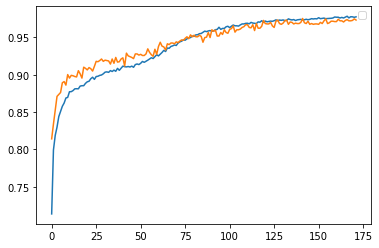

In [ ]:
plt.plot(mdl_history.history['accuracy'])
plt.plot(mdl_history.history['val_accuracy'])
plt.legend('train', 'test')

In [ ]:
y_pred = mdl.predict(x_test)

In [ ]:
y_pred = (y_pred>0.5).astype(int)

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[ 369   19]
 [  32 1496]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       388
           1       0.99      0.98      0.98      1528

    accuracy                           0.97      1916
   macro avg       0.95      0.97      0.96      1916
weighted avg       0.97      0.97      0.97      1916



### **Section 2 : Run the model after removing "fico" column from the data given that it is highly correlated**

In [ ]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [ ]:
df.drop(columns='fico',inplace=True)

In [ ]:
# Feature Transformation
x2 = df.iloc[:,1:].values
y2 = df.iloc[:,0].values

In [ ]:
# Label Encoding for "purpose" feature in dataset
le = LabelEncoder()
x2[:,0]=le.fit_transform(x2[:,0])

In [ ]:
# Scaling the dataset
# As this is a binary classification problem, we will use StandardScaler for X variables
ss = StandardScaler()
xscl2 = ss.fit_transform(x2)

In [ ]:
# Train test split
x_train2, x_test2, y_train, y_test = train_test_split(xscl2, y, random_state=23, train_size=0.8)

In [ ]:
x_train2.shape

(7662, 12)

In [ ]:
x_test2.shape

(1916, 12)

In [ ]:
# Model Architecture for a deep learning ( ANN model )
mdl2 = tf.keras.models.Sequential()
mdl2.add(tf.keras.layers.Dense(units=7,activation="relu",input_shape=(12,)))
mdl2.add(tf.keras.layers.Dense(units=7,activation="relu"))
mdl2.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [ ]:
# Compile ANN model
mdl2.compile(optimizer="rmsprop",loss="binary_crossentropy", metrics=['accuracy'])

In [ ]:
es2 = tf.keras.callbacks.EarlyStopping(patience=30,)

In [ ]:
# Fit the model
mdl_history2 = mdl2.fit(x_train2, y_train, epochs=1000, callbacks=[es2], class_weight=class_weights, validation_data=(x_test2,y_test))

Epoch 1/1000
240/240 [==============================] - 1s 3ms/step - loss: 2.0600 - accuracy: 0.5429 - val_loss: 0.6397 - val_accuracy: 0.6926
Epoch 2/1000
240/240 [==============================] - 1s 2ms/step - loss: 1.6297 - accuracy: 0.7539 - val_loss: 0.4680 - val_accuracy: 0.8340
Epoch 3/1000
240/240 [==============================] - 1s 3ms/step - loss: 1.3317 - accuracy: 0.8237 - val_loss: 0.3844 - val_accuracy: 0.8497
Epoch 4/1000
240/240 [==============================] - 1s 3ms/step - loss: 1.2344 - accuracy: 0.8369 - val_loss: 0.3449 - val_accuracy: 0.8648
Epoch 5/1000
240/240 [==============================] - 1s 2ms/step - loss: 1.1936 - accuracy: 0.8422 - val_loss: 0.3385 - val_accuracy: 0.8622
Epoch 6/1000
240/240 [==============================] - 1s 3ms/step - loss: 1.1717 - accuracy: 0.8469 - val_loss: 0.3398 - val_accuracy: 0.8554
Epoch 7/1000
240/240 [==============================] - 1s 2ms/step - loss: 1.1514 - accuracy: 0.8457 - val_loss: 0.3239 - val_accuracy:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This i

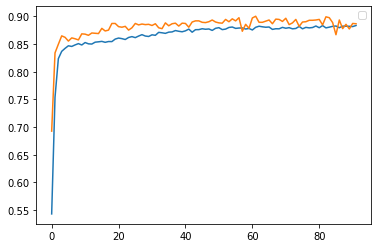

In [ ]:
plt.plot(mdl_history2.history['accuracy'])
plt.plot(mdl_history2.history['val_accuracy'])
plt.legend('train', 'test')

In [ ]:
y_pred2 = mdl2.predict(x_test2)

In [ ]:
y_pred2 = (y_pred2>0.5).astype(int)

In [ ]:
print(confusion_matrix(y_test,y_pred2))

[[ 329   59]
 [ 158 1370]]


In [ ]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.68      0.85      0.75       388
           1       0.96      0.90      0.93      1528

    accuracy                           0.89      1916
   macro avg       0.82      0.87      0.84      1916
weighted avg       0.90      0.89      0.89      1916



### **Results & Inference**

The accuracy, precision have both reduced significantly by removing the column fico - this indicates fico informs the model significantly, so we may have to look at other columns. However, the model with all columns performed well on test data with a higher accuracy as we saw earlier, so we will go with that model